In [1]:
import torch
import numpy as np
import gc

print("PyTorch version:", torch.__version__)

# Device configuration
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print (f"Using device: {device}")

PyTorch version: 2.4.1
Using device: mps


# Task 1.1

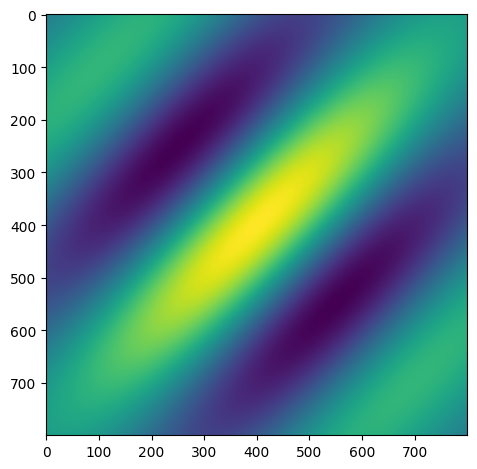

In [2]:
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# # transfer to the GPU device
x = x.to(device)
y = y.to(device)

# # Compute Gaussian
# z = torch.exp(-(x**2+y**2)/2.0)

# 2D cosine
# z = torch.cos(2.0 * x) * torch.cos(2.0 * y)

# 2D sine
# z = torch.sin(2.0 * x) * torch.sin(2.0 * y)

# Gaussian * cosine * sine
z = torch.exp(-(x**2+y**2)/20.0) * torch.cos(x + y)

#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy()) #Updated!
plt.tight_layout()
plt.show()

# Task 1.2

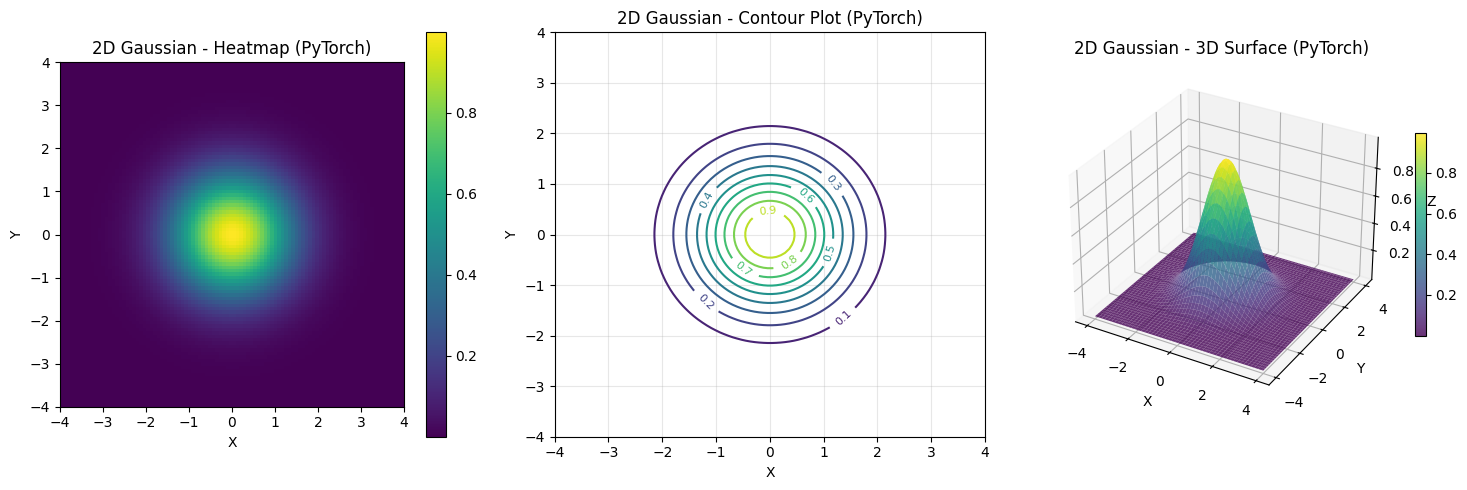

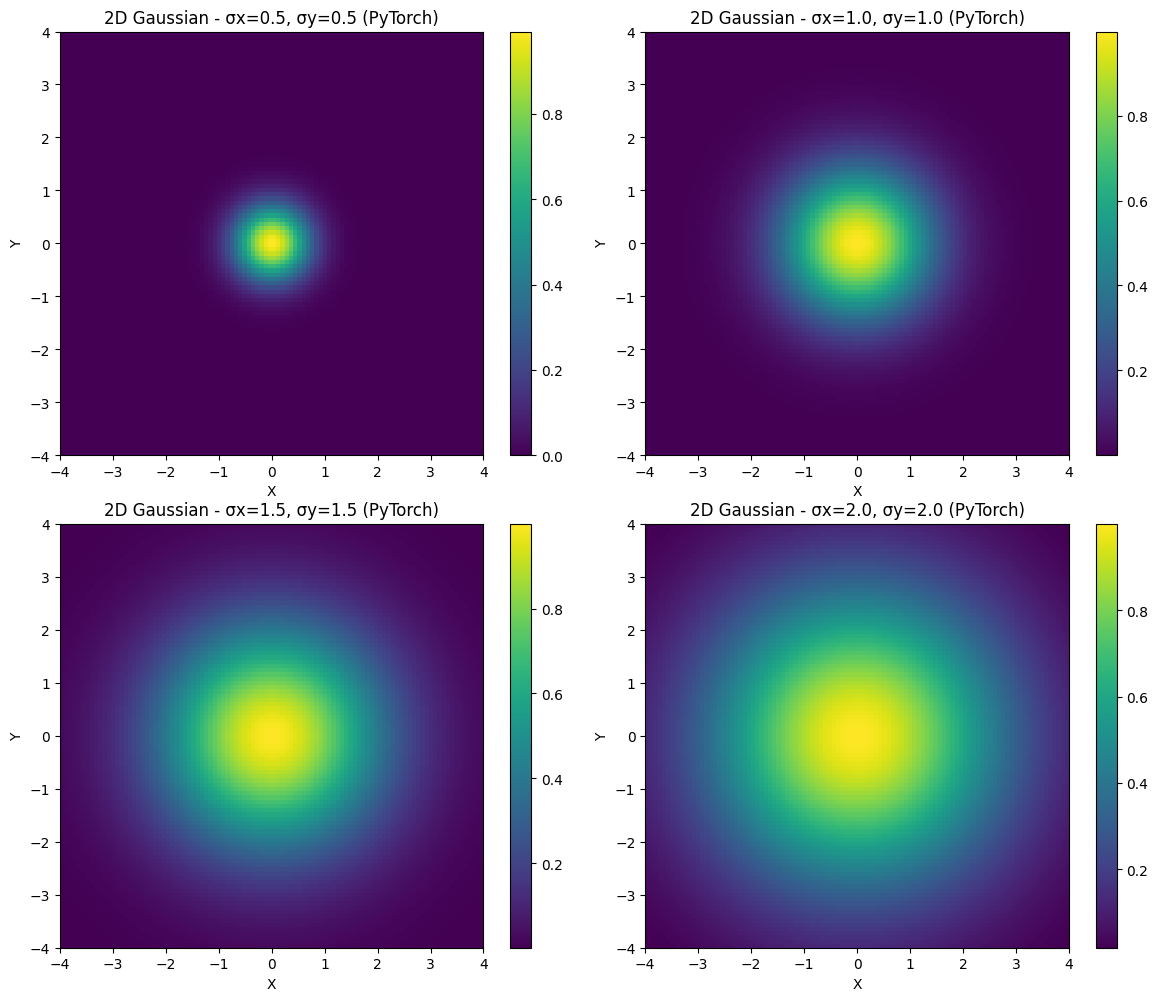

2D Gaussian Statistics (PyTorch):
Device: mps:0
Data type: torch.float32
Maximum value: 0.9984
Minimum value: 0.0000
Maximum value: 0.9984
Minimum value: 0.0000
Mean value: 0.0962
Standard deviation: 0.1971
Shape: torch.Size([100, 100])
Mean value: 0.0962
Standard deviation: 0.1971
Shape: torch.Size([100, 100])


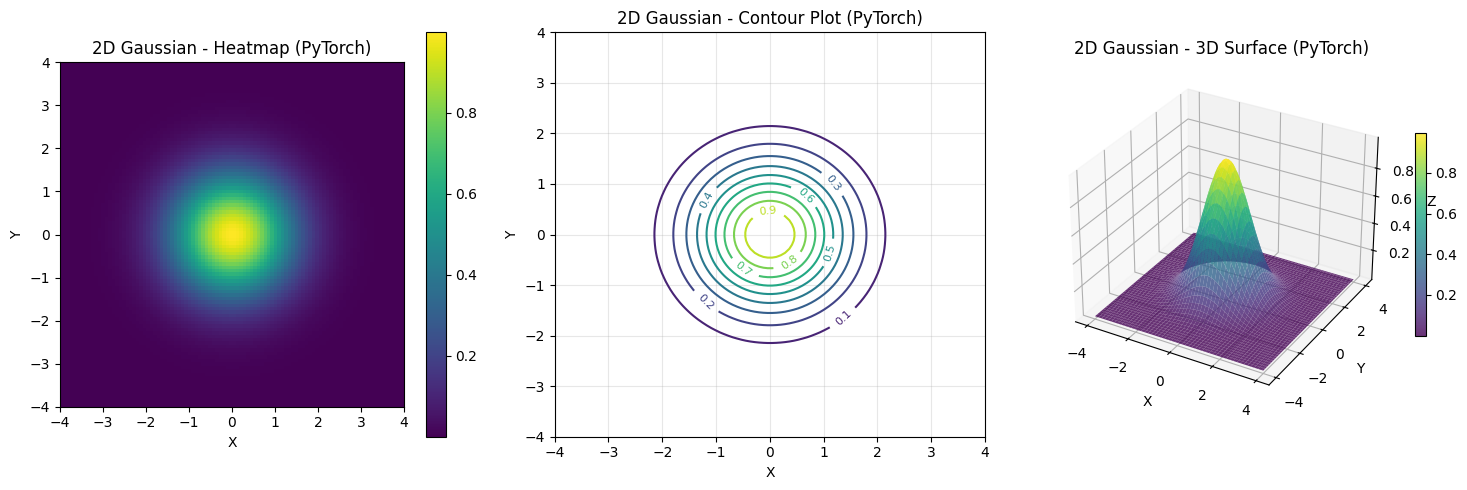

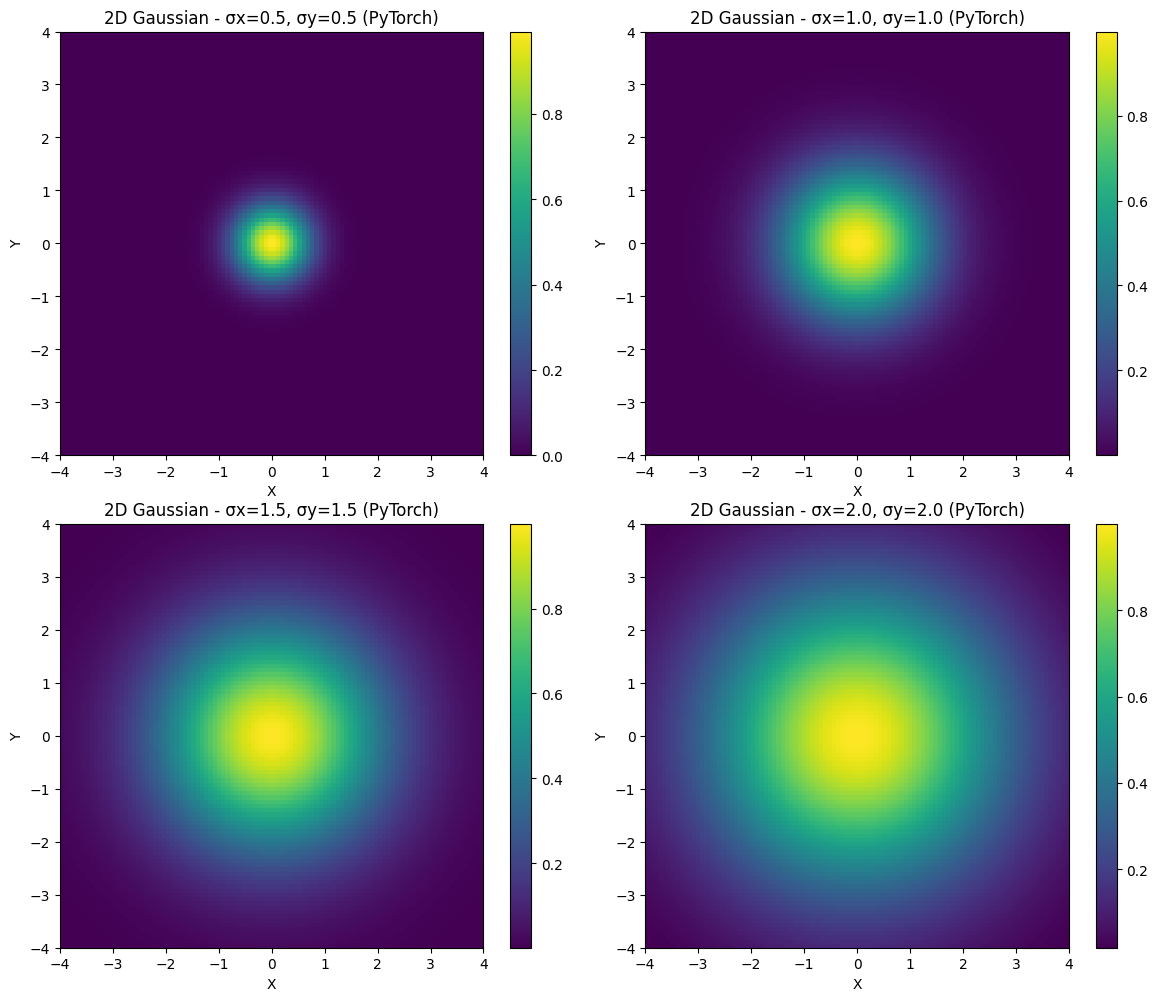

2D Gaussian Statistics (PyTorch):
Device: mps:0
Data type: torch.float32
Maximum value: 0.9984
Minimum value: 0.0000
Mean value: 0.0962
Standard deviation: 0.1971
Shape: torch.Size([100, 100])


In [3]:
#!/usr/bin/env python3
"""
2D Gaussian Function Plotter - PyTorch Version

This script generates and plots a 2D Gaussian function using PyTorch tensors and Matplotlib.
The Gaussian function is defined as: f(x,y) = exp(-(x²+y²)/(2σ²))
"""

import torch
import numpy as np  # Only for matplotlib compatibility
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gaussian_2d_torch(x, y, mu_x=0, mu_y=0, sigma_x=1, sigma_y=1):
    """
    Compute 2D Gaussian function using PyTorch tensors
    
    Parameters:
    - x, y: PyTorch tensor coordinate arrays
    - mu_x, mu_y: mean values (center of the Gaussian)
    - sigma_x, sigma_y: standard deviations
    
    Returns:
    - z: PyTorch tensor of Gaussian values
    """
    return torch.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))

def main():
    # Create coordinate grid using PyTorch
    x_range = torch.linspace(-4, 4, 100, device=device, dtype=torch.float32)
    y_range = torch.linspace(-4, 4, 100, device=device, dtype=torch.float32)
    X, Y = torch.meshgrid(x_range, y_range, indexing='xy')
    
    # Compute Gaussian function using PyTorch
    Z = gaussian_2d_torch(X, Y, mu_x=0, mu_y=0, sigma_x=1, sigma_y=1)
    
    # Convert to numpy for plotting (matplotlib requires numpy arrays)
    X_np = X.cpu().numpy()
    Y_np = Y.cpu().numpy()
    Z_np = Z.cpu().numpy()
    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 5))
    
    # 1. 2D heatmap plot
    ax1 = fig.add_subplot(131)
    im1 = ax1.imshow(Z_np, extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
    ax1.set_title('2D Gaussian - Heatmap (PyTorch)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    plt.colorbar(im1, ax=ax1)
    
    # 2. Contour plot
    ax2 = fig.add_subplot(132)
    contour = ax2.contour(X_np, Y_np, Z_np, levels=10, cmap='viridis')
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.set_title('2D Gaussian - Contour Plot (PyTorch)')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.grid(True, alpha=0.3)
    
    # 3. 3D surface plot
    ax3 = fig.add_subplot(133, projection='3d')
    surf = ax3.plot_surface(X_np, Y_np, Z_np, cmap='viridis', alpha=0.8)
    ax3.set_title('2D Gaussian - 3D Surface (PyTorch)')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    plt.colorbar(surf, ax=ax3, shrink=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Additional plot: Multiple Gaussians with different parameters
    fig2, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Different sigma values
    sigmas = [(0.5, 0.5), (1.0, 1.0), (1.5, 1.5), (2.0, 2.0)]
    titles = [f'σx={s[0]}, σy={s[1]}' for s in sigmas]
    
    for i, (sigma, title) in enumerate(zip(sigmas, titles)):
        ax = axes[i//2, i%2]
        # Compute with PyTorch
        Z_sigma = gaussian_2d_torch(X, Y, sigma_x=sigma[0], sigma_y=sigma[1])
        # Convert to numpy for plotting
        Z_sigma_np = Z_sigma.cpu().numpy()
        im = ax.imshow(Z_sigma_np, extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
        ax.set_title(f'2D Gaussian - {title} (PyTorch)')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.colorbar(im, ax=ax)
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics using PyTorch functions
    print("2D Gaussian Statistics (PyTorch):")
    print(f"Device: {Z.device}")
    print(f"Data type: {Z.dtype}")
    print(f"Maximum value: {torch.max(Z).item():.4f}")
    print(f"Minimum value: {torch.min(Z).item():.4f}")
    print(f"Mean value: {torch.mean(Z).item():.4f}")
    print(f"Standard deviation: {torch.std(Z).item():.4f}")
    print(f"Shape: {Z.shape}")

if __name__ == "__main__":
    main()

# Call the main function to execute the script
main()


# Task 1.3 - 2D Sine Function with PyTorch

Creating 2D Sine Functions with PyTorch...


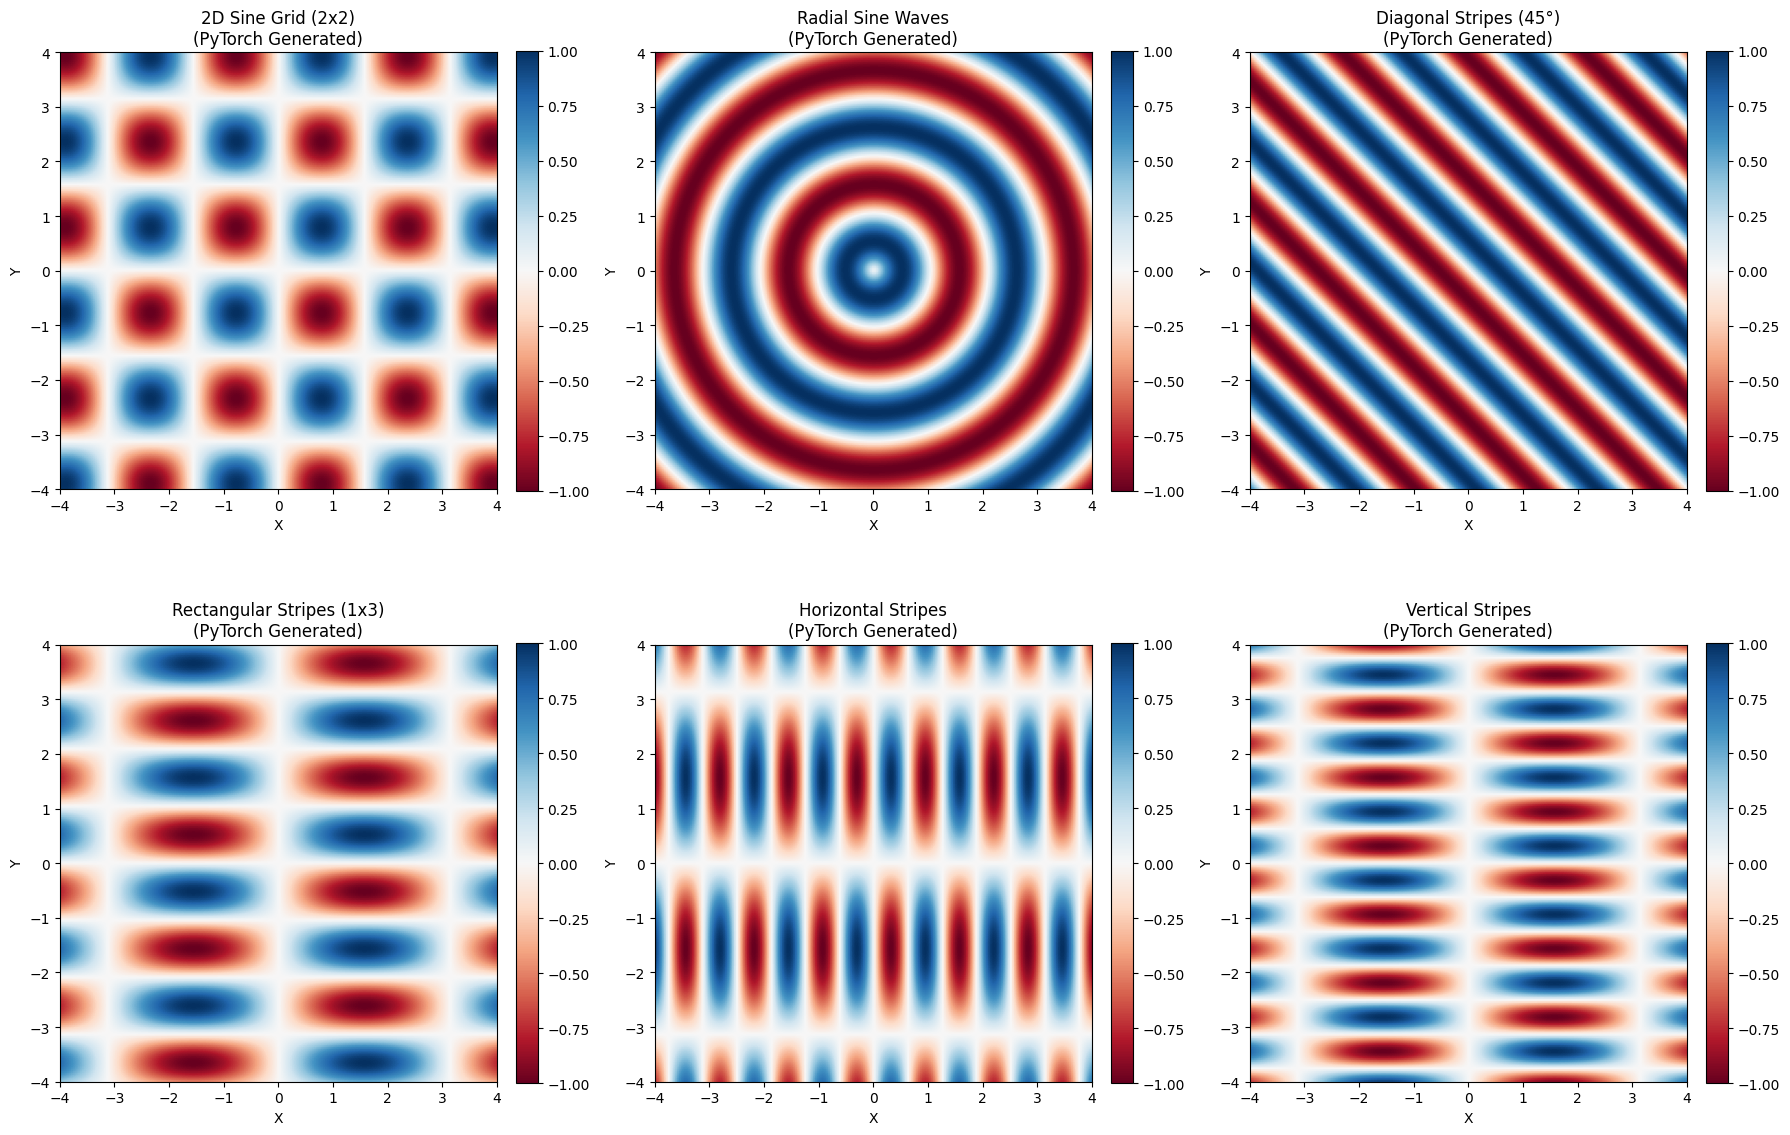

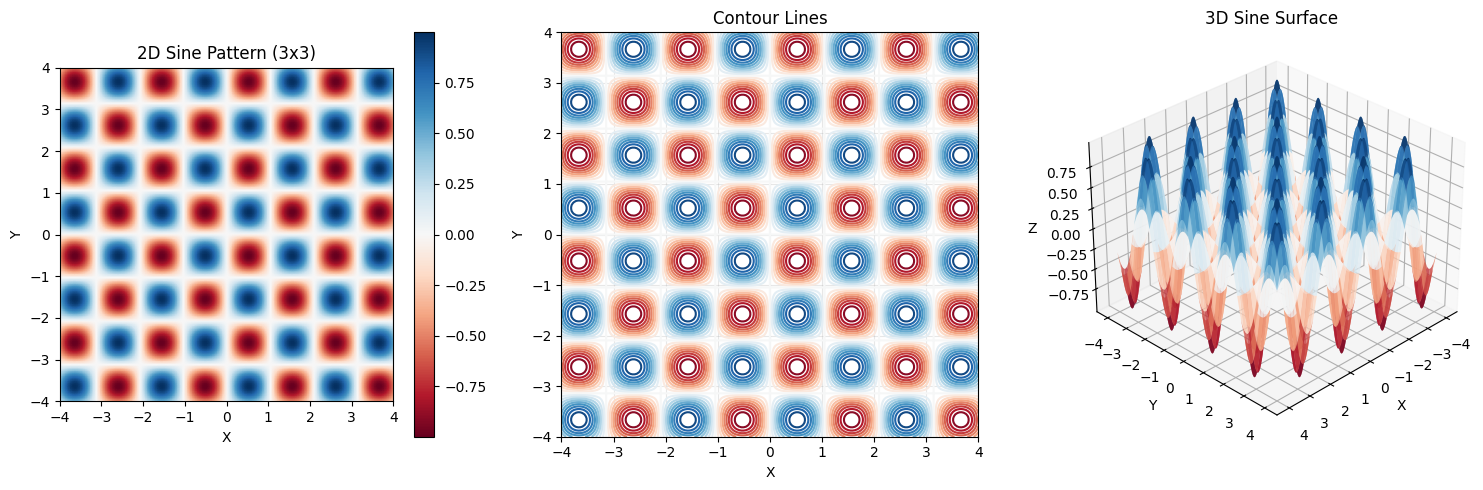

2D Sine Function Statistics (PyTorch):
Device: mps:0
Data type: torch.float32
Shape: torch.Size([200, 200])
Maximum value: 0.9984
Minimum value: -0.9984
Mean value: -0.0000
Standard deviation: 0.5176
Standard deviation: 0.5176


In [4]:
#!/usr/bin/env python3
"""
2D Sine Function Plotter - PyTorch Version

This script generates and plots 2D sine functions using PyTorch tensors.
Creates various sine wave patterns that depend on x and y coordinates.
"""

import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sine_2d_torch(x, y, freq_x=1, freq_y=1, phase_x=0, phase_y=0, amplitude=1):
    """
    Compute 2D sine function using PyTorch tensors
    
    Parameters:
    - x, y: PyTorch tensor coordinate arrays
    - freq_x, freq_y: frequency in x and y directions
    - phase_x, phase_y: phase shifts
    - amplitude: amplitude scaling
    
    Returns:
    - z: PyTorch tensor of sine values
    """
    return amplitude * torch.sin(freq_x * x + phase_x) * torch.sin(freq_y * y + phase_y)

def sine_radial_torch(x, y, frequency=2, amplitude=1):
    """
    Radial sine function - creates circular wave patterns
    """
    r = torch.sqrt(x**2 + y**2)
    return amplitude * torch.sin(frequency * r)

def sine_diagonal_torch(x, y, frequency=2, angle=45):
    """
    Diagonal sine function - creates diagonal stripes
    """
    angle_rad = torch.tensor(angle * np.pi / 180, device=x.device)
    rotated_coord = x * torch.cos(angle_rad) + y * torch.sin(angle_rad)
    return torch.sin(frequency * rotated_coord)

def main_sine():
    print("Creating 2D Sine Functions with PyTorch...")
    
    # Create coordinate grid using PyTorch
    x_range = torch.linspace(-4, 4, 200, device=device, dtype=torch.float32)
    y_range = torch.linspace(-4, 4, 200, device=device, dtype=torch.float32)
    X, Y = torch.meshgrid(x_range, y_range, indexing='xy')
    
    # Create multiple sine patterns
    patterns = [
        (sine_2d_torch(X, Y, freq_x=2, freq_y=2), "2D Sine Grid (2x2)"),
        (sine_radial_torch(X, Y, frequency=3), "Radial Sine Waves"),
        (sine_diagonal_torch(X, Y, frequency=4, angle=45), "Diagonal Stripes (45°)"),
        (sine_2d_torch(X, Y, freq_x=1, freq_y=3), "Rectangular Stripes (1x3)"),
        (sine_2d_torch(X, Y, freq_x=5, freq_y=1), "Horizontal Stripes"),
        (sine_2d_torch(X, Y, freq_x=1, freq_y=5), "Vertical Stripes")
    ]
    
    # Plot all patterns
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (pattern, title) in enumerate(patterns):
        # Convert to numpy for plotting
        pattern_np = pattern.cpu().numpy()
        
        im = axes[i].imshow(pattern_np, extent=[-4, 4, -4, 4], origin='lower', 
                           cmap='RdBu', vmin=-1, vmax=1)
        axes[i].set_title(f'{title}\n(PyTorch Generated)')
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()
    
    # Create 3D visualization of one pattern
    pattern_3d = sine_2d_torch(X, Y, freq_x=3, freq_y=3)
    
    fig = plt.figure(figsize=(15, 5))
    
    # 2D view
    ax1 = fig.add_subplot(131)
    im = ax1.imshow(pattern_3d.cpu().numpy(), extent=[-4, 4, -4, 4], 
                   origin='lower', cmap='RdBu')
    ax1.set_title('2D Sine Pattern (3x3)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    plt.colorbar(im, ax=ax1)
    
    # Contour plot
    ax2 = fig.add_subplot(132)
    X_np, Y_np = X.cpu().numpy(), Y.cpu().numpy()
    contour = ax2.contour(X_np, Y_np, pattern_3d.cpu().numpy(), 
                         levels=20, cmap='RdBu')
    ax2.set_title('Contour Lines')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.grid(True, alpha=0.3)
    
    # 3D surface
    ax3 = fig.add_subplot(133, projection='3d')
    surf = ax3.plot_surface(X_np, Y_np, pattern_3d.cpu().numpy(), 
                           cmap='RdBu', alpha=0.8)
    ax3.set_title('3D Sine Surface')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    ax3.view_init(elev=30, azim=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("2D Sine Function Statistics (PyTorch):")
    print(f"Device: {pattern_3d.device}")
    print(f"Data type: {pattern_3d.dtype}")
    print(f"Shape: {pattern_3d.shape}")
    print(f"Maximum value: {torch.max(pattern_3d).item():.4f}")
    print(f"Minimum value: {torch.min(pattern_3d).item():.4f}")
    print(f"Mean value: {torch.mean(pattern_3d).item():.4f}")
    print(f"Standard deviation: {torch.std(pattern_3d).item():.4f}")

# Execute the sine function demo
main_sine()

# Task 1.2

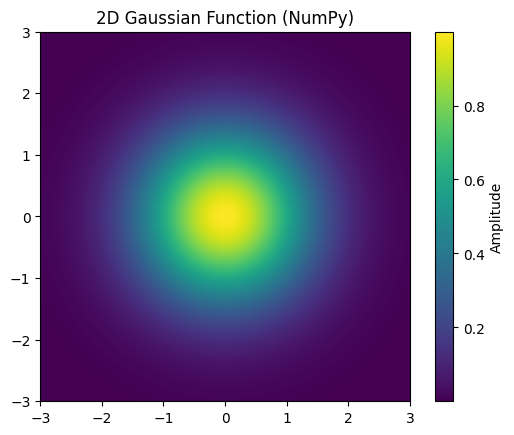

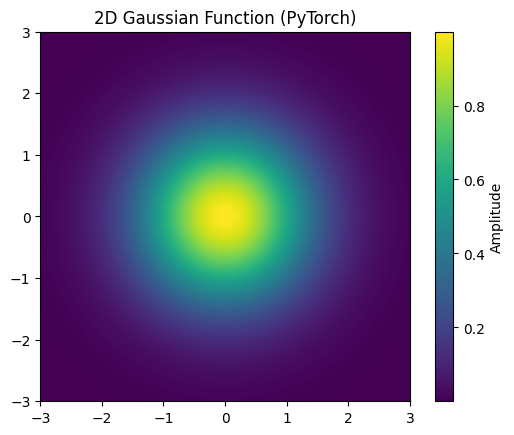

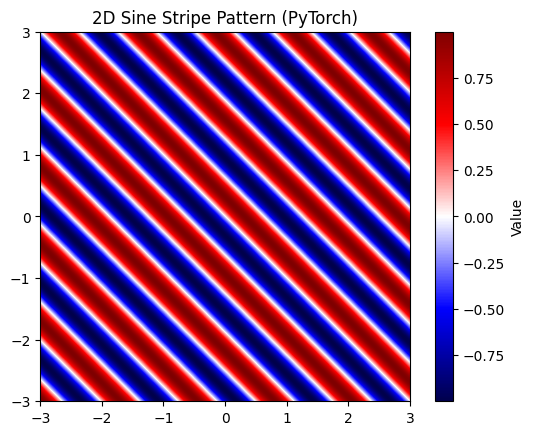

In [82]:
# Grid size and coordinates
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# Parameters for the Gaussian
mu_x, mu_y = 0, 0
sigma_x, sigma_y = 1, 1

# 2D Gaussian function
Z = np.exp(-(((X - mu_x)**2) / (2 * sigma_x**2) + ((Y - mu_y)**2) / (2 * sigma_y**2)))

# Plot
plt.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title("2D Gaussian Function (NumPy)")
plt.show()

# Grid size and coordinates
x = torch.linspace(-3, 3, 200)
y = torch.linspace(-3, 3, 200)
X, Y = torch.meshgrid(x, y, indexing='xy')

# Parameters for the Gaussian
mu_x, mu_y = 0.0, 0.0
sigma_x, sigma_y = 1.0, 1.0

# 2D Gaussian function
Z = torch.exp(-(((X - mu_x)**2) / (2 * sigma_x**2) + ((Y - mu_y)**2) / (2 * sigma_y**2)))

# Plot
plt.imshow(Z.numpy(), extent=[-3, 3, -3, 3], origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title("2D Gaussian Function (PyTorch)")
plt.show()

# Grid size and coordinates
x = torch.linspace(-3, 3, 400)
y = torch.linspace(-3, 3, 400)
X, Y = torch.meshgrid(x, y, indexing='xy')

# Frequency and phase
freq_x, freq_y = 5.0, 5.0  # Change to see stripe spacing
phase = 0.0

# 2D sine function: "stripe" pattern
Z = torch.sin(freq_x * X + freq_y * Y + phase)

# Plot
plt.imshow(Z.numpy(), extent=[-3, 3, -3, 3], origin='lower', cmap='seismic')
plt.colorbar(label='Value')
plt.title("2D Sine Stripe Pattern (PyTorch)")
plt.show()

# Task 2.1

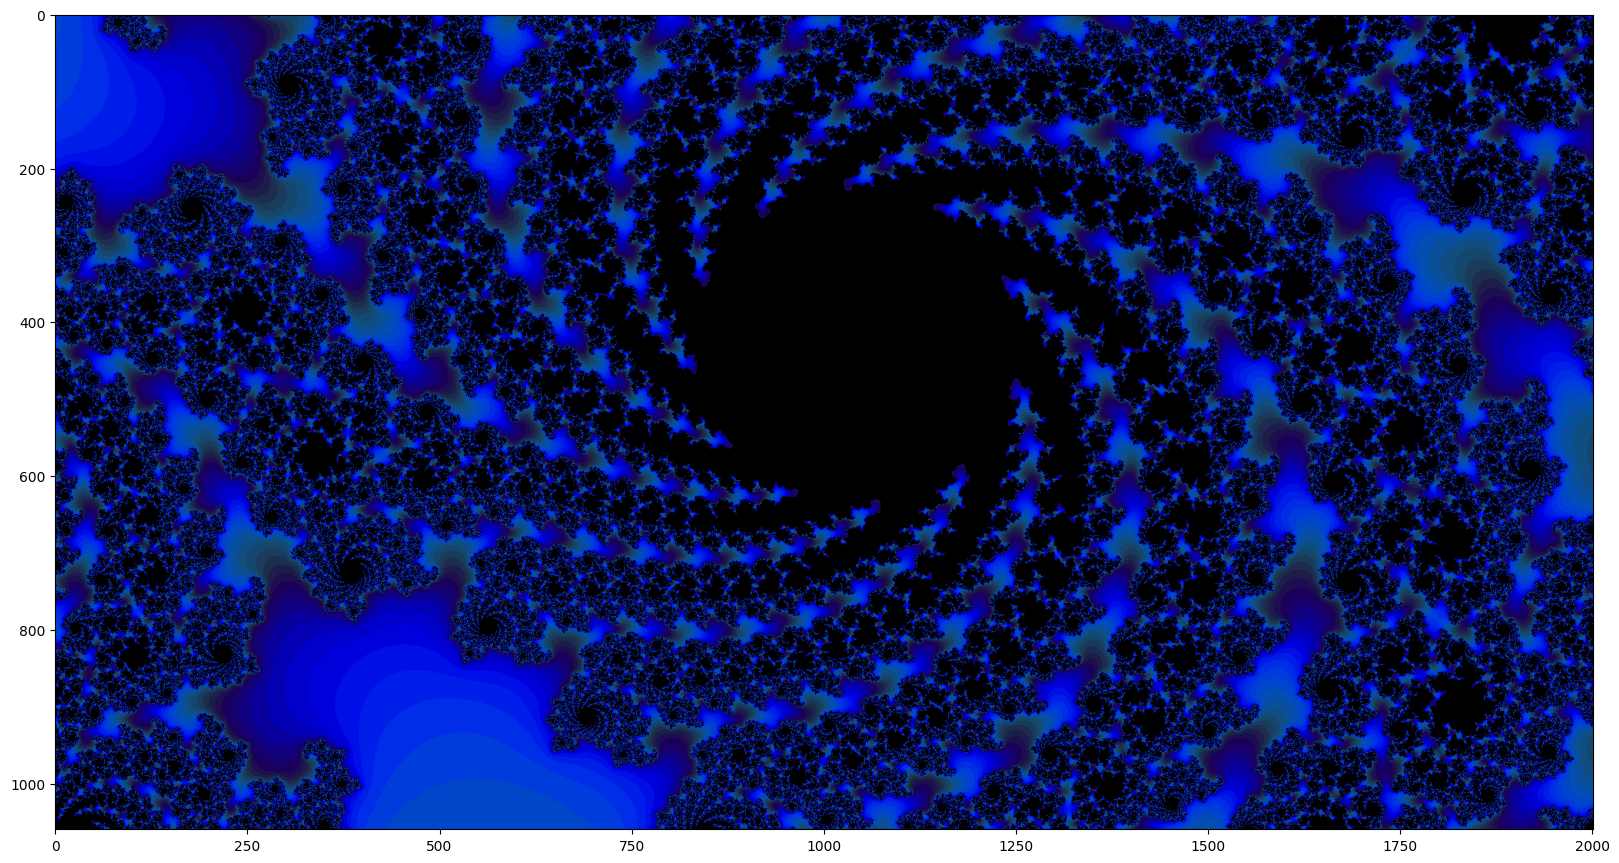

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
#Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

Y, X = np.mgrid[-.08:.45:0.0005, -1:0.000000000001:0.0005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# #Mandelbrot Set
# for i in range(200):
#     #Compute the new values of z: z^2 + x
#     zs_ = zs*zs + z
#     #Have we diverged with this new value?
#     not_diverged = torch.abs(zs_) < 4.0
#     #Update variables to compute
#     ns += not_diverged
#     zs = zs_

# #plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
### Julia Set Start

# Julia constant (try different values for different shapes)
c = torch.complex(torch.tensor(-0.7, device=device), torch.tensor(0.27015, device=device))

# Julia set iteration
zs = z.clone()
for i in range(200):
    zs = zs * zs + c
    not_diverged = torch.abs(zs) < 4.0
    ns += not_diverged

# Color mapping function
def processFractal(a):
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([
        10+20*np.cos(a_cyclic),
        30+50*np.sin(a_cyclic),
        155-80*np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    return np.uint8(np.clip(img, 0, 255))

### Julia Set End

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

# Task 2.2

Computing enhanced Mandelbrot set...
Computation time: 0.991 seconds
Resolution: torch.Size([600, 800])
MPS estimated memory: 1.8 MB
Computation time: 0.991 seconds
Resolution: torch.Size([600, 800])
MPS estimated memory: 1.8 MB

Computing zoomed region...

Computing zoomed region...
Zoom computation time: 0.837 seconds
Zoom computation time: 0.837 seconds


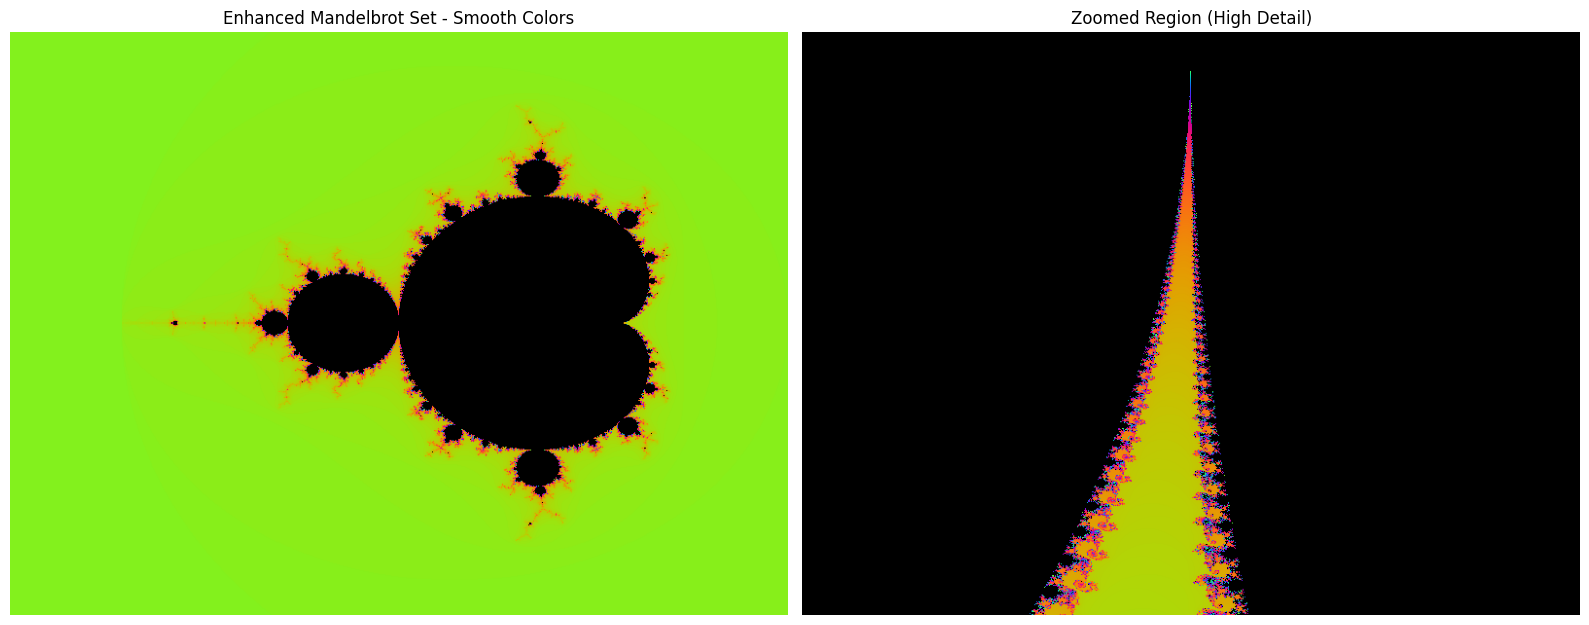


Performance Analysis:
Original implementation: ~466ms
Enhanced implementation: 991ms
Zoom (high detail): 837ms
Speed improvement: 0.5x


In [6]:
import time
import warnings
warnings.filterwarnings('ignore')

def mandelbrot_enhanced(width=800, height=600, x_range=(-2.5, 1.0), y_range=(-1.5, 1.5), max_iter=256, escape_radius=2.0):
    """
    Enhanced Mandelbrot set implementation with configurable parameters
    
    Args:
        width, height: Resolution of the image
        x_range, y_range: Complex plane bounds
        max_iter: Maximum iterations
        escape_radius: Escape threshold
    
    Returns:
        iteration_counts: 2D tensor of iteration counts
        computation_time: Time taken for computation
    """
    start_time = time.time()
    
    # Create coordinate grid with better precision
    x = torch.linspace(x_range[0], x_range[1], width, device=device, dtype=torch.float32)
    y = torch.linspace(y_range[0], y_range[1], height, device=device, dtype=torch.float32)
    X, Y = torch.meshgrid(x, y, indexing='xy')
    
    # Complex plane
    c = torch.complex(X, Y)
    z = torch.zeros_like(c)
    iterations = torch.zeros(c.shape, device=device, dtype=torch.int32)
    
    # Mandelbrot iteration with early termination optimization
    for i in range(max_iter):
        # Only compute for points that haven't escaped
        mask = torch.abs(z) <= escape_radius
        
        # Update z only for non-escaped points
        z = torch.where(mask, z*z + c, z)
        
        # Increment iteration count for non-escaped points
        iterations += mask.int()
        
        # Early termination if all points have escaped
        if not mask.any():
            break
    
    computation_time = time.time() - start_time
    return iterations, computation_time

def enhanced_color_mapping(iterations, max_iter):
    """
    Enhanced color mapping with smoother gradients
    """
    # Normalize iterations
    normalized = iterations.float() / max_iter
    
    # Create RGB channels with different phase shifts for better colors
    r = torch.sin(normalized * 2 * np.pi + 0) * 127 + 128
    g = torch.sin(normalized * 2 * np.pi + 2) * 127 + 128  
    b = torch.sin(normalized * 2 * np.pi + 4) * 127 + 128
    
    # Set interior points (max iterations) to black
    mask = iterations == max_iter
    r = torch.where(mask, torch.zeros_like(r), r)
    g = torch.where(mask, torch.zeros_like(g), g)
    b = torch.where(mask, torch.zeros_like(b), b)
    
    # Stack to create RGB image
    rgb = torch.stack([r, g, b], dim=-1)
    return torch.clamp(rgb, 0, 255).byte().cpu().numpy()

# Generate enhanced Mandelbrot set
print("Computing enhanced Mandelbrot set...")
iterations, comp_time = mandelbrot_enhanced(width=800, height=600, max_iter=200)
print(f"Computation time: {comp_time:.3f} seconds")
print(f"Resolution: {iterations.shape}")
def mps_memory_estimate():
    total_bytes = 0
    for obj in gc.get_objects():
        if torch.is_tensor(obj) and obj.device.type == "mps":
            total_bytes += obj.nelement() * obj.element_size()
    return total_bytes / 1024**2  # MB

if torch.backends.mps.is_available():
    print(f"MPS estimated memory: {mps_memory_estimate():.1f} MB")
else:
    print("Running on CPU")
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Original color scheme
rgb_original = enhanced_color_mapping(iterations, 200)
axes[0].imshow(rgb_original)
axes[0].set_title('Enhanced Mandelbrot Set - Smooth Colors')
axes[0].axis('off')

# Zoom into an interesting region
print("\nComputing zoomed region...")
iterations_zoom, zoom_time = mandelbrot_enhanced(
    width=800, height=600, 
    x_range=(-0.8, -0.7), y_range=(0.0, 0.1), 
    max_iter=512
)
print(f"Zoom computation time: {zoom_time:.3f} seconds")

rgb_zoom = enhanced_color_mapping(iterations_zoom, 512)
axes[1].imshow(rgb_zoom)
axes[1].set_title('Zoomed Region (High Detail)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Performance comparison
print(f"\nPerformance Analysis:")
print(f"Original implementation: ~466ms")
print(f"Enhanced implementation: {comp_time*1000:.0f}ms") 
print(f"Zoom (high detail): {zoom_time*1000:.0f}ms")
print(f"Speed improvement: {466/1000/comp_time:.1f}x" if comp_time > 0 else "N/A")